# 3. Theoretical yields and media optimization

In [2]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

model = read_sbml_model('Models/yeast8.xml')

Review of the default medium composition, printing the different species' concentrations.

In [3]:
# Review the default medium composition
for m in model.medium.items():
    print(model.reactions.get_by_id(m[0]), "|", model.reactions.get_by_id(m[0]).name, "| conc. =", m[1])

r_1654: s_0420 <=>  | ammonium exchange | conc. = 1000.0
r_1714: s_0565 <=>  | D-glucose exchange | conc. = 1.0
r_1832: s_0796 <=>  | H+ exchange | conc. = 1000.0
r_1861: s_0925 <=>  | iron(2+) exchange | conc. = 1000.0
r_1992: s_1277 <=>  | oxygen exchange | conc. = 1000.0
r_2005: s_1324 <=>  | phosphate exchange | conc. = 1000.0
r_2020: s_1374 <=>  | potassium exchange | conc. = 1000.0
r_2049: s_1438 <=>  | sodium exchange | conc. = 1000.0
r_2060: s_1468 <=>  | sulphate exchange | conc. = 1000.0
r_2100: s_0805 <=>  | water exchange | conc. = 1000.0
r_4593: s_4200 <=>  | chloride exchange | conc. = 1000.0
r_4594: s_4201 <=>  | Cu2(+) exchange | conc. = 1000.0
r_4595: s_4202 <=>  | Mn(2+) exchange | conc. = 1000.0
r_4596: s_4203 <=>  | Zn(2+) exchange | conc. = 1000.0
r_4597: s_4204 <=>  | Mg(2+) exchange | conc. = 1000.0
r_4600: s_4199 <=>  | Ca(2+) exchange | conc. = 1000.0


We set the objective to the reaction, which is producing isoamyl acetate, and we optimize our model, obtaining the maximum isoamyl acetate productivity

Now, we can calcualte the theoretical yield, which represents how many isoamyl acetate mol can be obtained from one mol of glucose, calculated as the proportion between the glucose uptake and isoamyl acetate production

In [4]:
with model:
    model.objective = model.reactions.r_1180 
    isoamyl_acetate_production = model.optimize().objective_value
    print("Maximum productivity of isoamyl acetate = {:.2f} mmol/gDW*h".format(isoamyl_acetate_production))

    glc_uptake_flux = model.reactions.r_1714.flux 
    max_yield = isoamyl_acetate_production / (-1*glc_uptake_flux)
    print("Maximum theoretical yield = {:.2f} mmol-isoa/mmol-glc".format(max_yield))

Maximum productivity of isoamyl acetate = 0.56 mmol/gDW*h
Maximum theoretical yield = 0.56 mmol-isoa/mmol-glc


Without any genetic engineering and glucose as the main carbon source in the default medium, the maximum hypothetical production of isoamyl acetate is 0.56 mmol/gDW*h

### Effect of the glucose uptake when growth is set as the objective

Now we change glucose concentration in our medium, and setting growth rate as the objective we check how the growth rate and isoamyl acetate production changes

In [5]:
medium_glc_ex = model.reactions.get_by_id('r_1714')

# Increase glucose concentration in the medium
medium = model.medium
with model: 
    growth_rate = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = growth_rate / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print("Maximum theoretical growth rate = {:.2f} mmol/gDW*h".format(growth_rate))
    print("Maximum theoretical yield = {:.2f} mmol/mmol-glc\n".format(max_yield))
 
    # Glucose level 100-fold increase 
    medium[medium_glc_ex.id] = 100 
    model.medium = medium
    growth_rate = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = growth_rate / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print("Maximum theoretical growth rate = {:.2f} mmol/gDW*h".format(growth_rate))
    print("Maximum theoretical yield = {:.2f} mmol/mmol-glc\n".format(max_yield))
    

     # Glucose level 200-fold increase 
    medium[medium_glc_ex.id] = 200
    model.medium = medium
    growth_rate = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = growth_rate / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print("Maximum theoretical growth rate = {:.2f} mmol/gDW*h".format(growth_rate))
    print("Maximum theoretical yield = {:.2f} mmol/mmol-glc\n".format(max_yield))

    # Glucose level 500-fold increase 
    medium[medium_glc_ex.id] = 500
    model.medium = medium
    growth_rate = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = growth_rate / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print("Maximum theoretical growth rate = {:.2f} mmol/gDW*h".format(growth_rate))
    print("Maximum theoretical yield = {:.2f} mmol/mmol-glc\n".format(max_yield))


    # Glucose level 600-fold increase 
    medium[medium_glc_ex.id] = 600
    model.medium = medium
    growth_rate = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = growth_rate / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print("Maximum theoretical growth rate = {:.2f} mmol/gDW*h".format(growth_rate))
    print("Maximum theoretical yield = {:.2f} mmol/mmol-glc\n".format(max_yield))

    # Glucose level 650-fold increase 
    medium[medium_glc_ex.id] = 650
    model.medium = medium
    growth_rate = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = growth_rate / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print("Maximum theoretical growth rate = {:.2f} mmol/gDW*h".format(growth_rate))
    print("Maximum theoretical yield = {:.2f} mmol/mmol-glc\n".format(max_yield))
       

At glucose concentration = 1.0:
Maximum theoretical growth rate = 0.08 mmol/gDW*h
Maximum theoretical yield = 0.08 mmol/mmol-glc

At glucose concentration = 100:
Maximum theoretical growth rate = 8.50 mmol/gDW*h
Maximum theoretical yield = 0.08 mmol/mmol-glc

At glucose concentration = 200:
Maximum theoretical growth rate = 11.76 mmol/gDW*h
Maximum theoretical yield = 0.06 mmol/mmol-glc

At glucose concentration = 500:
Maximum theoretical growth rate = 18.08 mmol/gDW*h
Maximum theoretical yield = 0.04 mmol/mmol-glc

At glucose concentration = 600:
Maximum theoretical growth rate = 19.82 mmol/gDW*h
Maximum theoretical yield = 0.03 mmol/mmol-glc

At glucose concentration = 650:
Maximum theoretical growth rate = 19.82 mmol/gDW*h
Maximum theoretical yield = 0.03 mmol/mmol-glc



Growth rate raises with increasing glucose level up till 600-fold glucose concentration increase. Maximal growth rate reaches 19.82 mmol/gDW*h. It can also be seen that past the point of 100-fold increase in glucose level, the yield drops, i.e. increase in glucose concentration does not scale equally with the growth rate anymore.

### Effect of the glucose uptake when isoamyl acetate production is set as the objective

We repeat the same as before but with growth rate as the objective we check how the growth rate and isoamyl acetate production changes

In [6]:
medium = model.medium
 
with model:
    model.objective = model.reactions.r_1180 
    isoamyl_acetate_production = model.optimize().objective_value  
    glc_uptake_flux = model.reactions.r_1714.flux 
    max_yield = isoamyl_acetate_production / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print("Maximum theoretical isoamyl acetate productivity = {:.2f} mmol/gDW*h".format(isoamyl_acetate_production))
    print("Maximum theoretical yield = {:.2f} mmol/mmol-glc\n".format(max_yield))

    medium[medium_glc_ex.id] = 100
    model.medium = medium
    isoamyl_acetate_production = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = isoamyl_acetate_production / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print("Maximum theoretical isoamyl acetate productivity  = {:.2f} mmol/gDW*h".format(isoamyl_acetate_production))
    print("Maximum theoretical yield = {:.2f} mmol/mmol-glc\n".format(max_yield))
    
    medium[medium_glc_ex.id] = 600
    model.medium = medium
    isoamyl_acetate_production = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = isoamyl_acetate_production / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print("Maximum theoretical isoamyl acetate productivity  = {:.2f} mmol/gDW*h".format(isoamyl_acetate_production))
    print("Maximum theoretical yield = {:.2f} mmol/mmol-glc\n".format(max_yield))

At glucose concentration = 1.0:
Maximum theoretical isoamyl acetate productivity = 0.56 mmol/gDW*h
Maximum theoretical yield = 0.56 mmol/mmol-glc

At glucose concentration = 100:
Maximum theoretical isoamyl acetate productivity  = 56.72 mmol/gDW*h
Maximum theoretical yield = 0.57 mmol/mmol-glc

At glucose concentration = 600:
Maximum theoretical isoamyl acetate productivity  = 265.04 mmol/gDW*h
Maximum theoretical yield = 0.49 mmol/mmol-glc



By increasing glucose concentration, isoamyl acetate production always increases, but yield reaches its maximum at gl_conc=100 with 0.57 mmol/mmol-glc. We can also see that this maximum is almost reached also for gl_conc=1 (0.56 mmol/mmol-glc). This means that the theoretical yield can get its maximum value with a low glucose concentration. 

### Effect of the glucose uptake when both growth and isoamyl actetate poduction are set as the objective

Furthermore, we set a duoble objective for the model - toward isoamyl acetate synthesis and biomass production. In addition, we decided to add leucine to the medium, as it is, same as pyruvate, one of the precursors for isoamyl acetate (see 02_Model_and_pathway). 

<!-- The goal is to look for the conditions in which these rates are as high as possible but maintaining glucose concentration as low as possible in order to not waste media and money. -->

In [28]:
medium_leu_ex = model.reactions.get_by_id('r_1899')

with model: 
    medium[medium_glc_ex.id] = 100
    medium[medium_leu_ex.id] = 0
    model.medium = medium
    baseline_max_growth = model.optimize().objective_value
    model.objective = model.reactions.r_1180
    baseline_max_production = model.optimize().objective_value
    Glucose_exchange = model.reactions.get_by_id('r_1714') 
    model.objective = {model.reactions.get_by_id('r_2111'): baseline_max_production, 
                    model.reactions.get_by_id('r_1180'): baseline_max_growth} # objective is to maximise the production of isoamyl acetate while also growing as much as possible
    solution = model.optimize()
    isoamyl_acetate_production = solution.fluxes['r_1180']
    glucose_flux = model.reactions.r_1714.flux
    max_yield = isoamyl_acetate_production/(-1 * glucose_flux)
    print('Glucose uptake:',format(medium[Glucose_exchange.id]), 'mmol/gDW*h')
    print('Maximum growth:', round(solution.fluxes['r_2111'],2), '/h')
    print('Maximum isoamyl acetate productivity:', round(isoamyl_acetate_production,2), 'mmol/gDW*h') # calculate productivity
    print('Maximum isoamyl acetate yield:', round(max_yield,2), 'mmol isoamyl acetate/mmol glucose') # calculate yield on glucose

Glucose uptake: 100 mmol/gDW*h
Maximum growth: 3.8 /h
Maximum isoamyl acetate productivity: 34.82 mmol/gDW*h
Maximum isoamyl acetate yield: 0.35 mmol isoamyl acetate/mmol glucose


In [36]:
with model: 

    medium[medium_glc_ex.id] = 100
    medium[medium_leu_ex.id] = 39
    model.medium = medium
    baseline_max_growth = model.optimize().objective_value
    model.objective = model.reactions.r_1180
    baseline_max_production = model.optimize().objective_value
    Glucose_exchange = model.reactions.get_by_id('r_1714') 
    model.objective = {model.reactions.get_by_id('r_2111'): baseline_max_production, 
                    model.reactions.get_by_id('r_1180'): baseline_max_growth} # objective is to maximise the production of isoamyl acetate while also growing as much as possible
    solution = model.optimize()
    isoamyl_acetate_production = solution.fluxes['r_1180']
    glucose_flux = model.reactions.r_1714.flux
    max_yield = isoamyl_acetate_production/(-1 * glucose_flux)
    print('Glucose uptake:',format(medium[Glucose_exchange.id]), 'mmol/gDW*h')
    print('Maximum growth:', round(solution.fluxes['r_2111'],2), '/h')
    print('Maximum isoamyl acetate productivity:', round(isoamyl_acetate_production,2), 'mmol/gDW*h') # calculate productivity
    print('Maximum isoamyl acetate yield:', round(max_yield,2), 'mmol isoamyl acetate/mmol glucose') # calculate yield on galactose

Glucose uptake: 100 mmol/gDW*h
Maximum growth: 7.62 /h
Maximum isoamyl acetate productivity: 36.4 mmol/gDW*h
Maximum isoamyl acetate yield: 0.36 mmol isoamyl acetate/mmol glucose


In [37]:
with model: 

    medium[medium_glc_ex.id] = 100
    medium[medium_leu_ex.id] = 40
    model.medium = medium
    baseline_max_growth = model.optimize().objective_value
    model.objective = model.reactions.r_1180
    baseline_max_production = model.optimize().objective_value
    Glucose_exchange = model.reactions.get_by_id('r_1714') 
    model.objective = {model.reactions.get_by_id('r_2111'): baseline_max_production, 
                    model.reactions.get_by_id('r_1180'): baseline_max_growth} # objective is to maximise the production of isoamyl acetate while also growing as much as possible
    solution = model.optimize()
    isoamyl_acetate_production = solution.fluxes['r_1180']
    glucose_flux = model.reactions.r_1714.flux
    max_yield = isoamyl_acetate_production/(-1 * glucose_flux)
    print('Glucose uptake:',format(medium[Glucose_exchange.id]), 'mmol/gDW*h')
    print('Maximum growth:', round(solution.fluxes['r_2111'],2), '/h')
    print('Maximum isoamyl acetate productivity:', round(isoamyl_acetate_production,2), 'mmol/gDW*h') # calculate productivity
    print('Maximum isoamyl acetate yield:', round(max_yield,2), 'mmol isoamyl acetate/mmol glucose') # calculate yield on galactose

Glucose uptake: 100 mmol/gDW*h
Maximum growth: 7.59 /h
Maximum isoamyl acetate productivity: 37.42 mmol/gDW*h
Maximum isoamyl acetate yield: 0.37 mmol isoamyl acetate/mmol glucose


In [38]:
with model: 

    medium[medium_glc_ex.id] = 100
    medium[medium_leu_ex.id] = 50
    model.medium = medium
    baseline_max_growth = model.optimize().objective_value
    model.objective = model.reactions.r_1180
    baseline_max_production = model.optimize().objective_value
    Glucose_exchange = model.reactions.get_by_id('r_1714') 
    model.objective = {model.reactions.get_by_id('r_2111'): baseline_max_production, 
                    model.reactions.get_by_id('r_1180'): baseline_max_growth} # objective is to maximise the production of isoamyl acetate while also growing as much as possible
    solution = model.optimize()
    isoamyl_acetate_production = solution.fluxes['r_1180']
    glucose_flux = model.reactions.r_1714.flux
    max_yield = isoamyl_acetate_production/(-1 * glucose_flux)
    print('Glucose uptake:',format(medium[Glucose_exchange.id]), 'mmol/gDW*h')
    print('Maximum growth:', round(solution.fluxes['r_2111'],2), '/h')
    print('Maximum isoamyl acetate productivity:', round(isoamyl_acetate_production,2), 'mmol/gDW*h') # calculate productivity
    print('Maximum isoamyl acetate yield:', round(max_yield,2), 'mmol isoamyl acetate/mmol glucose') # calculate yield on galactose

Glucose uptake: 100 mmol/gDW*h
Maximum growth: 7.25 /h
Maximum isoamyl acetate productivity: 47.53 mmol/gDW*h
Maximum isoamyl acetate yield: 0.48 mmol isoamyl acetate/mmol glucose


It is observed that addition of leucine to the medium contributes to an increase in both productivities, escpecially isoamyl acetate. However, cost analysis is required regarding the product sell rate vs L-leucine costs to find a viable solution for its addition into the medium.

## Graphical representation
The simulations above are easier to analyze when presented on a graph - the biomass productivity and yield are plotted adjusting the glucose concentration in the medium in 50mmol/gDW*h intervals.

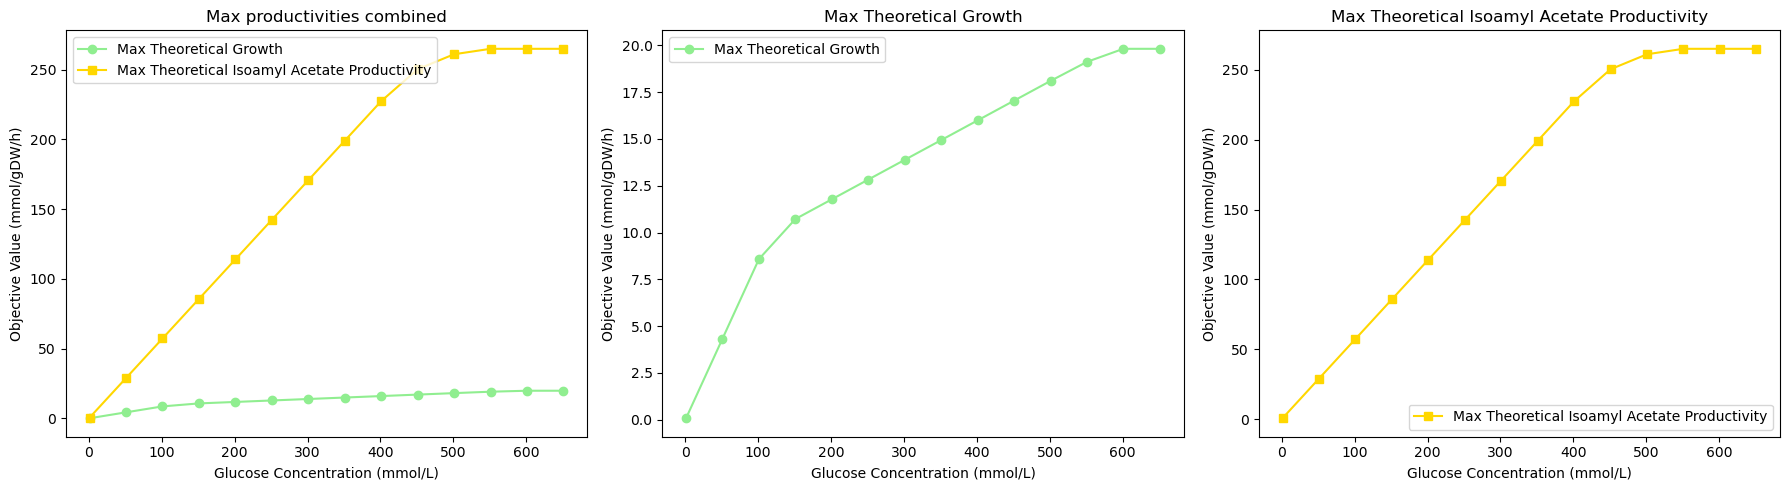

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the range of glucose concentrations to test
glucose_concentrations = list(range(1, 701, 50))

# Prepare a list to store the results
results_list = []

# Loop through each glucose concentration and run the model
for glucose in glucose_concentrations:
    with model:
        # Adjust medium according to the current glucose concentration
        medium = model.medium
        medium['r_1714'] = glucose  
        model.medium = medium

        # Run the optimization for growth
        growth = model.optimize().objective_value

        # Run the optimization for isoamyl acetate productivity
        model.objective = model.reactions.r_1180  
        isoamyl_acetate_production = model.optimize().objective_value

        # Append the results to the list
        results_list.append({
            'Glucose_Concentration': glucose,
            'Growth': growth,
            'Isoamyl_Acetate_Productivity': isoamyl_acetate_production
        })

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results_list)

# Plotting the combined graph, growth only, and isoamyl acetate productivity only
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Combined graph
axes[0].plot(results_df['Glucose_Concentration'], results_df['Growth'], color='lightgreen', label='Max Theoretical Growth', marker='o')
axes[0].plot(results_df['Glucose_Concentration'], results_df['Isoamyl_Acetate_Productivity'], color='gold', label='Max Theoretical Isoamyl Acetate Productivity', marker='s')
axes[0].set_xlabel('Glucose Concentration (mmol/L)')
axes[0].set_ylabel('Objective Value (mmol/gDW/h)')
axes[0].set_title('Max productivities combined')
axes[0].legend()

# Growth only graph
axes[1].plot(results_df['Glucose_Concentration'], results_df['Growth'], color='lightgreen', label='Max Theoretical Growth', marker='o')
axes[1].set_xlabel('Glucose Concentration (mmol/L)')
axes[1].set_ylabel('Objective Value (mmol/gDW/h)')
axes[1].set_title('Max Theoretical Growth')
axes[1].legend()

# Isoamyl acetate productivity only graph
axes[2].plot(results_df['Glucose_Concentration'], results_df['Isoamyl_Acetate_Productivity'], color='gold', label='Max Theoretical Isoamyl Acetate Productivity', marker='s')
axes[2].set_xlabel('Glucose Concentration (mmol/L)')
axes[2].set_ylabel('Objective Value (mmol/gDW/h)')
axes[2].set_title('Max Theoretical Isoamyl Acetate Productivity')
axes[2].legend()

# Display the plots
plt.tight_layout()
plt.show()

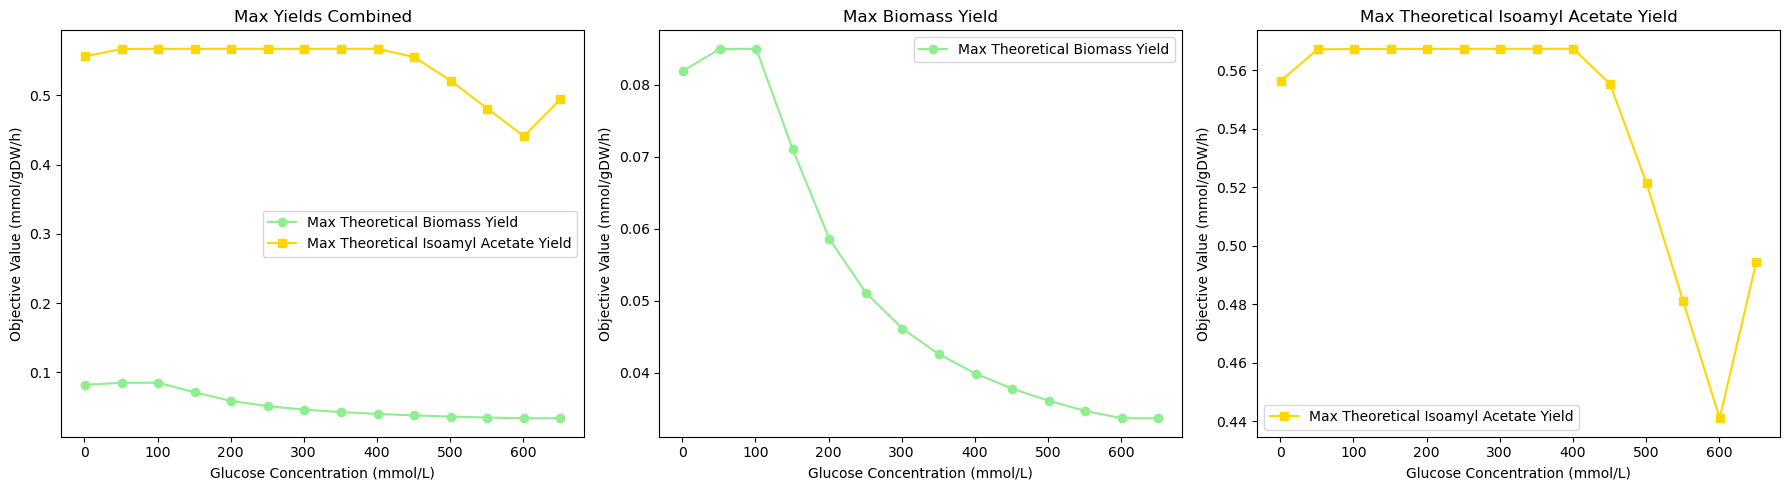

In [21]:
# Define the range of glucose concentrations to test
glucose_concentrations = list(range(1, 701, 50))

# Prepare a list to store the results
results_list = []

# Loop through each glucose concentration and run the model
for glucose in glucose_concentrations:
    with model:
        # Adjust medium according to the current glucose concentration
        medium = model.medium
        medium['r_1714'] = glucose  
        model.medium = medium

        # Run the optimization for growth
        growth = model.optimize().objective_value
        glc_uptake_flux = model.reactions.r_1714.flux 
        max_growth = growth / (-1*glc_uptake_flux)

        # Run the optimization for isoamyl acetate productivity
        model.objective = model.reactions.r_1180  
        isoamyl_acetate_production = model.optimize().objective_value
        glc_uptake_flux = model.reactions.r_1714.flux 
        max_isoamyl_acetate_production = isoamyl_acetate_production / (-1*glc_uptake_flux)

        # Append the results to the list
        results_list.append({
            'Glucose_Concentration': glucose,
            'Growth': max_growth,
            'Isoamyl_Acetate_Productivity': max_isoamyl_acetate_production
        })

# Convert the list of results to a DataFrame
results_df2 = pd.DataFrame(results_list)

# Plotting the combined graph, growth only, and isoamyl acetate productivity only
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Combined graph
axes[0].plot(results_df2['Glucose_Concentration'], results_df2['Growth'], color='lightgreen', label='Max Theoretical Biomass Yield', marker='o')
axes[0].plot(results_df2['Glucose_Concentration'], results_df2['Isoamyl_Acetate_Productivity'], color='gold', label='Max Theoretical Isoamyl Acetate Yield', marker='s')
axes[0].set_xlabel('Glucose Concentration (mmol/L)')
axes[0].set_ylabel('Objective Value (mmol/gDW/h)')
axes[0].set_title('Max Yields Combined')
axes[0].legend()

# Growth only graph
axes[1].plot(results_df2['Glucose_Concentration'], results_df2['Growth'], color='lightgreen', label='Max Theoretical Biomass Yield', marker='o')
axes[1].set_xlabel('Glucose Concentration (mmol/L)')
axes[1].set_ylabel('Objective Value (mmol/gDW/h)')
axes[1].set_title('Max Biomass Yield')
axes[1].legend()

# Isoamyl acetate productivity only graph
axes[2].plot(results_df2['Glucose_Concentration'], results_df2['Isoamyl_Acetate_Productivity'], color='gold', label='Max Theoretical Isoamyl Acetate Yield', marker='s')
axes[2].set_xlabel('Glucose Concentration (mmol/L)')
axes[2].set_ylabel('Objective Value (mmol/gDW/h)')
axes[2].set_title('Max Theoretical Isoamyl Acetate Yield')
axes[2].legend()

# Display the plots
plt.tight_layout()
plt.show()


In order to choose the most optimal medium composition for our process, growth rate needs to be considered as well as the isoamyl acetate yield and production - as when having more cells more product is made overall.

Isoamyl acetate productivity and cell growth increases with higher glucose concentrations up till ~550mmol/L, it does not correspond to the changes in the yield. At the highest glucose concentrations we do not get as much product units per unit of glucose. The most optimal value could be find by the substrate-cost-to-yield analysis and the actual fermentation experiments. However, this initial analysis gives a good overview on the possible glucose ranges to be tested.

